In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import os
import seaborn as sns
from keras.applications.vgg16 import VGG16


['asl_alphabet_train', 'asl_alphabet_test']


In [2]:
SIZE = 96  #Resize images

In [2]:
from IPython.lib.display import join
batch_size = 64
imageSize = 96
target_dims = (imageSize, imageSize, 3)
num_classes = 29

# /mnt/5cd1329d-6ad0-4c91-904e-ba21c872357b/Sukanya/Vaishnavi_Munghate_2023/asl_alphabet/asl_alphabet_train/asl_alphabet_train

train_len = 0
train_dir = r"../Vaishnavi_Munghate_2023/asl_alphabet/asl_alphabet_train/asl_alphabet_train"

total = 0
for folder in os.listdir(train_dir):
    for img in os.listdir(train_dir + "/" + folder):
        train_len += 1
train_len

len = 26
S = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
map = {}

for j in range(len):
  map[S[j:j+1]] = join

t_lower = 50
t_upper = 150

def get_data(folder):
    x = []
    y = []
    cnt, label = 0, 0
    for folderName in sorted(os.listdir(folder)):
        s = str(folderName)
        for j in range(len):
          if S[j] == s:
            label = j
        
        print(label, folderName)

        for image_filename in os.listdir(folder + '/' + folderName):
            image_path = folder + '/' + folderName + '/' + image_filename
            img_file = cv2.imdecode(np.fromfile(image_path, dtype=np.uint8), cv2.IMREAD_UNCHANGED)
            if img_file is not None:
                img_file = cv2.resize(img_file, (imageSize, imageSize))
#                 img_file = cv2.cvtColor(img_file, cv2.COLOR_BGR2GRAY)
                # img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                # img_arr = np.asarray(img_file).reshape((-1, imageSize, imageSize, 3))
                # edge = cv2.Canny(img_file, t_lower, t_upper)
                x.append(img_file)
                y.append(label)
                cnt += 1

    return x,y

X, Y = get_data(train_dir)

print("Images successfully imported...")

0 A
1 B
2 C
3 D
4 E
5 F
6 G
7 H
8 I
9 J
10 K
11 L
12 M
13 N
14 O
15 P
16 Q
17 R
18 S
19 T
20 U
21 V
22 W
23 X
24 Y
25 Z
25 del
25 nothing
25 space
Images successfully imported...


In [1]:
X = np.array(X)
Y = np.array(Y)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, stratify = Y)

print("Shape of x_train : ", x_train.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of x_test : ", x_test.shape)
print("Shape of y_test : ", y_test.shape)

NameError: name 'np' is not defined

Shape of x_train :  (6525, 96, 96, 3)
Shape of y_train :  (6525,)
Shape of x_test :  (725, 96, 96, 3)
Shape of y_test :  (725,)


In [4]:
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [8]:
#Load model wothout classifier/fully connected layers
VGG_model = VGG16(include_top=False, weights = None, input_shape=(imageSize, imageSize, 3))
# vgg = vgg16.VGG16(include_top=False, weights=None, input_shape=(IMG_SIZE, IMG_SIZE, 1))

2023-04-27 09:13:08.580141: I tensorflow/stream_executor/cuda/cuda_driver.cc:739] failed to allocate 5.53M (5796608 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2023-04-27 09:13:08.596102: I tensorflow/stream_executor/cuda/cuda_driver.cc:739] failed to allocate 5.53M (5796608 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2023-04-27 09:13:18.600711: I tensorflow/stream_executor/cuda/cuda_driver.cc:739] failed to allocate 5.53M (5796608 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2023-04-27 09:13:18.604239: I tensorflow/stream_executor/cuda/cuda_driver.cc:739] failed to allocate 5.53M (5796608 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2023-04-27 09:13:18.604296: W tensorflow/core/common_runtime/bfc_allocator.cc:462] Allocator (GPU_0_bfc) ran out of memory trying to allocate 576.0KiB (rounded to 589824)requested by op Mul
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' w

ResourceExhaustedError: failed to allocate memory [Op:Mul]

In [6]:
#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in VGG_model.layers:
	layer.trainable = False

NameError: name 'VGG_model' is not defined

In [78]:
VGG_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      640       
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [79]:
#Now, let us use features from convolutional network for RF
feature_extractor=VGG_model.predict(x_train)



In [80]:
print("Shape of feature extractor : ", feature_extractor.shape)

Shape of feature extractor :  (34125, 4, 4, 512)


In [81]:
features = feature_extractor.reshape(feature_extractor.shape[0], -1)
X_for_training = features
X_for_training

array([[3.1732675e-04, 2.5354710e-03, 1.6934297e-04, ..., 2.0145410e-04,
        0.0000000e+00, 5.4666272e-04],
       [1.2393552e-04, 2.8928483e-03, 5.5423810e-04, ..., 3.8561446e-04,
        0.0000000e+00, 1.0086661e-03],
       [2.2227748e-04, 2.9189382e-03, 4.0790075e-04, ..., 2.5928961e-04,
        5.9007143e-06, 1.2167963e-04],
       ...,
       [1.7393392e-04, 2.7560447e-03, 3.1264860e-04, ..., 6.5978384e-04,
        0.0000000e+00, 1.0737020e-03],
       [3.2144756e-04, 3.2117087e-03, 9.9843182e-04, ..., 4.1217636e-04,
        0.0000000e+00, 1.4415891e-03],
       [0.0000000e+00, 1.6972566e-03, 0.0000000e+00, ..., 3.1549722e-04,
        0.0000000e+00, 1.9937316e-03]], dtype=float32)

In [82]:
print("Shape of x_for_training : ", X_for_training.shape)

Shape of x_for_training :  (34125, 8192)


In [ ]:
#XGBOOST
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_for_training, y_train) #For sklearn no one hot encoding

In [61]:
#Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

In [62]:
X_test_feature.shape

(4550, 3, 3, 512)

In [63]:
# Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_test)
test_labels_encoded = le.transform(y_test)
le.fit(y_train)
train_labels_encoded = le.transform(y_train)

In [64]:
prediction = model.predict(X_test_features)
prediction = le.inverse_transform(prediction)


In [65]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction))

Accuracy =  1.0


[[175   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0 175   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0 175   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0 175   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0 175   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 175   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 175   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 175   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 175   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0  

<AxesSubplot:>

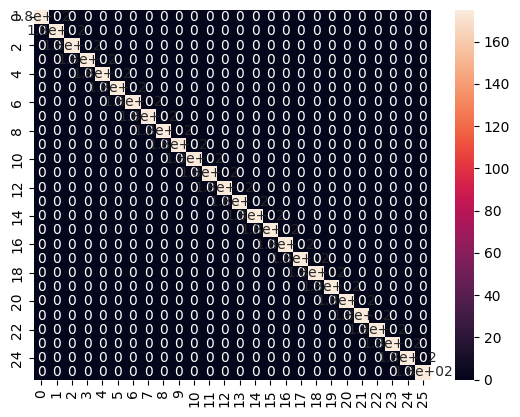

In [66]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction)
print(cm)
sns.heatmap(cm, annot=True)

The prediction for this image is:  [4]


NameError: name 'test_labels' is not defined

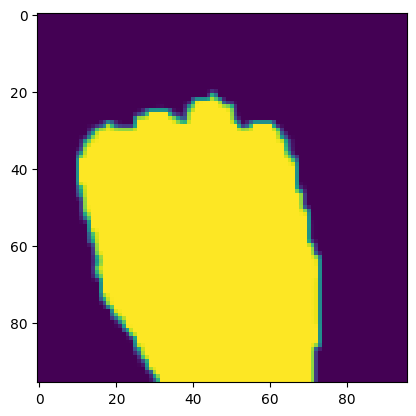

In [67]:
#Check results on a few select images
n=np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction = model.predict(input_img_features)[0] 
prediction = le.inverse_transform([prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])

In [ ]:
#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in VGG_model.layers:
	layer.trainable = False

In [ ]:
VGG_model.summary()

In [ ]:
#Now, let us use features from convolutional network for RF
feature_extractor=VGG_model.predict(x_train)
feature_extractor

In [ ]:
feature_extractor

In [ ]:
features = feature_extractor.reshape(feature_extractor.shape[0], -1)
X_for_training = features #This is our X input to RF
features.shape


In [ ]:
#XGBOOST
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_for_training, y_train) #For sklearn no one hot encoding

In [ ]:
#Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)


In [ ]:
prediction = model.predict(X_test_features)
# prediction = le.inverse_transform(prediction)


In [ ]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction))